In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [8]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_2_2(심각도).csv',encoding='cp949')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   사고유형         58059 non-null  int64
 1   연령가해자        58059 non-null  int64
 2   법규위반가해자      58059 non-null  int64
 3   행동유형가해자      58059 non-null  int64
 4   피해자신체상해주부위   58059 non-null  int64
 5   차량용도가해자_중분류  58059 non-null  int64
 6   도로종류         58059 non-null  int64
 7   도로형태         58059 non-null  int64
 8   도로선형         58059 non-null  int64
 9   발생시각         58059 non-null  int64
 10  심각도          58059 non-null  int64
dtypes: int64(11)
memory usage: 4.9 MB


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [10]:
y=df['심각도']

In [11]:
feature_columns = df.columns.difference(["심각도"]) # Target column 빼기

X=df.drop(['심각도'],axis=1)
y=pd.DataFrame(df['심각도'])

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(40641, 10) (17418, 10) (40641, 1) (17418, 1)


# train & OLS 회귀모델 적합

In [12]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              8830.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:37:45   Log-Likelihood:                         -26004.
No. Observations:               40641   AIC:                                  5.203e+04
Df Residuals:                   40631   BIC:                                  5.211e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.0248      0.001     19.000      0.000       0.022       0.027
연령가해자           0.0135      0.001      9.557      0.000       0.011       0.016
법규위반가해자         0.0134      0.002      7.303      0.000       0.010       0.017
행동유형가해자         0.0162      0.001     16.505      0.000       0.014       0.018
피해자신체상해주부위      0.0113      0.000     25.795      0.000       0.010       0.012
차량용도가해자_중분류     0.0143      0.001     22.752      0.000       0.013       0.015
도로종류            0.0220      0.002     11.878      0.000       0.018       0.026
도로형태            0.0110      0.003      3.895      0.000       0.005       0.017
도로선형            0.0381      0.004      9.181      0.000       0.030       0.046
발생시각            0.0219      0.001     18.480      0.000       0.020       0.024
==============================================================================
Omnibus:                    64712.704   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5262.732
Skew:                          -0.621   Prob(JB):                         0.00
Kurtosis:                       1.749   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [14]:
corolla = pd.concat([X,y],axis=1)  # 더미변수 + 종속변수 
#corolla = sm.add_constant(corolla, has_constant='add')

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,2.948401,사고유형
1,8.103548,연령가해자
2,8.690131,법규위반가해자
3,7.736281,행동유형가해자
4,2.920673,피해자신체상해주부위
5,8.487067,차량용도가해자_중분류
6,3.007371,도로종류
7,10.120133,도로형태
8,5.322546,도로선형
9,4.052711,발생시각


## VIF Factor가 10 이상인 <도로형태> 컬럼 삭제 후  OLS 재진행

In [16]:
X = X.drop(['도로형태'],axis=1)

In [17]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              9839.
Date:                Thu, 26 Nov 2020   Prob (F-statistic):                        0.00
Time:                        15:39:44   Log-Likelihood:                         -25975.
No. Observations:               40641   AIC:                                  5.197e+04
Df Residuals:                   40632   BIC:                                  5.205e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.0260      0.001     19.956      0.000       0.023       0.029
연령가해자           0.0147      0.001     10.534      0.000       0.012       0.017
법규위반가해자         0.0145      0.002      8.205      0.000       0.011       0.018
행동유형가해자         0.0174      0.001     18.393      0.000       0.016       0.019
피해자신체상해주부위      0.0113      0.000     25.955      0.000       0.010       0.012
차량용도가해자_중분류     0.0150      0.001     24.054      0.000       0.014       0.016
도로종류            0.0237      0.002     12.876      0.000       0.020       0.027
도로선형            0.0387      0.004      9.592      0.000       0.031       0.047
발생시각            0.0205      0.001     17.459      0.000       0.018       0.023
==============================================================================
Omnibus:                    54582.048   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5186.922
Skew:                          -0.619   Prob(JB):                         0.00
Kurtosis:                       1.764   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ▶ y 예측값

In [18]:
pred_y = fitted_full_model.predict(test_x)
pd.DataFrame(pred_y)

,0
26448,0.588469
53245,0.871174
31277,0.902913
25247,0.552685
1124,0.288733
...,...
12345,0.882342
232,0.707695
57011,0.671475
9712,0.621339


###  다중공선성 재검사
### ▶ 10 넘는 것 없음

In [19]:
corolla = pd.concat([X,y],axis=1)
#corolla = sm.add_constant(corolla, has_constant='add')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,2.944871,사고유형
1,7.987258,연령가해자
2,8.039497,법규위반가해자
3,7.238513,행동유형가해자
4,2.896405,피해자신체상해주부위
5,8.409037,차량용도가해자_중분류
6,2.979514,도로종류
7,5.048331,도로선형
8,4.019721,발생시각
9,3.193203,심각도


---

---

---

# ■ ols 모델에서 중요 변수를 선택하는 과정을 수행해보자

### ▶ 위 진행방식과 달리 상수항을 정의하기위해 'const'라는 컬럼을 추가하였다. (각 행마다 1을 부여)

### ▶ 아래에 결과를 보면 R값이 약 2.5% 또는 2.6%가 산출되는데, const를 추가함으로써 생기는 새로운 문제이다.

### ▶ 상수항을 제거한 모델을 사용하는것에는 많은 오류가 있는 것으로 보인다.

# 0.변수선택법

In [21]:
feature_columns = X.columns.difference(["심각도"])

In [22]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088AA46C4C0>, 'AIC': 51968.019631214134}


In [23]:
train_x= sm.add_constant(train_x, has_constant='add')

In [24]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [25]:
print(getBest(x=train_x,y=train_y,k=2))

Processed 36 models on 2 predictors in 0.21770882606506348 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                52740.9
Name: 28, dtype: object


In [26]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 9 models on 1 predictors in 0.05414295196533203 seconds.
Processed 36 models on 2 predictors in 0.21731925010681152 seconds.
Processed 84 models on 3 predictors in 0.6311333179473877 seconds.
Processed 126 models on 4 predictors in 1.1349997520446777 seconds.
Total elapsed time :  2.207519054412842 seconds
            AIC                                              model
1  53294.157970  <statsmodels.regression.linear_model.Regressio...
2  52740.937232  <statsmodels.regression.linear_model.Regressio...
3  52322.793277  <statsmodels.regression.linear_model.Regressio...
4  52010.635783  <statsmodels.regression.linear_model.Regressio...


In [27]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    심각도   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     539.7
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:44:43   Log-Likelihood:                -26000.
No. Observations:               40641   AIC:                         5.201e+04
Df Residuals:                   40636   BIC:                         5.205e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형            0.0260      0.001     19.920      0.000       0.023       0.029
차량용도가해자_중분류     0.0126      0.001     20.163      0.000       0.011       0.014
피해자신체상해주부위      0.0107      0.000     24.377      0.000       0.010       0.012
행동유형가해자         0.0167      0.001     17.758      0.000       0.015       0.019
const           0.3063      0.009     34.290      0.000       0.289       0.324
==============================================================================
Omnibus:                  7058844.858   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6018.842
Skew:                          -0.666   Prob(JB):                         0.00
Kurtosis:                       1.665   Cond. No.                         56.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [29]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  9 models on 1 predictors in 0.051136016845703125
Selected predictors: ['피해자신체상해주부위', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088B21AABE0>
Processed  8 models on 2 predictors in 0.03313565254211426
Selected predictors: ['피해자신체상해주부위', '사고유형', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A9A41760>
Processed  7 models on 3 predictors in 0.04687976837158203
Selected predictors: ['피해자신체상해주부위', '사고유형', '차량용도가해자_중분류', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088B21AABB0>
Processed  6 models on 4 predictors in 0.04688000679016113
Selected predictors: ['피해자신체상해주부위', '사고유형', '차량용도가해자_중분류', '행동유형가해자', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A9A2B460>
Processed  5 models on 5 predictors in 0.06108427047729492
Selected predictors: ['피해자신체상해주부위', '사고유형', '차량용도가해자_중분류', '행동유

# 2.후진제거법

In [30]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 9 models on 8 predictors in 0.1275489330291748
Selected predictors : ['도로선형', '도로종류', '발생시각', '사고유형', '연령가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A9A2B1C0>
Processed 8 models on 7 predictors in 0.09376001358032227
Selected predictors : ['도로종류', '발생시각', '사고유형', '연령가해자', '차량용도가해자_중분류', '피해자신체상해주부위', '행동유형가해자', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088AF978F70>
Total elapsed time : 0.26601147651672363 seconds.
                            OLS Regression Results                            
Dep. Variable:                    심각도   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     311.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                     

# 3.단계적선택법

In [31]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  9 models on 1 predictors in 0.048127174377441406
Selected predictors: ['피해자신체상해주부위', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A9A71250>
forward
Processed 1 models on 0 predictors in 0.004010438919067383
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A9A71370>
Processed  8 models on 2 predictors in 0.046121835708618164
Selected predictors: ['피해자신체상해주부위', '사고유형', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A99EF250>
forward
Processed 2 models on 1 predictors in 0.00952458381652832
Selected predictors : ['피해자신체상해주부위', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000088A99EF100>
Processed  7 models on 3 predictors in 0.04913067817687988
Selected predictors: ['피해자신체상해주부위', '사고유형', '차량용도가해자_중분류', 'const'] AIC :  <statsmodels.regression.linear_model.Regres

## ■ 3가지 모델 선택법 모두 변수 10개 중 8개를 선택
### ▶ 변수별 어떤 범주의 값이 영향이 큰 지 알 수 없어서 좋은 방법이 아닌 것 같다.

---

---

# ■ 스피어만 상관분석 테스트
### ▶ 순서척도로 바꾼 뒤 상관분석(척도의 형태를 고려하여 스피어만 사용)을 하여도 결과가 좋지 않음

In [40]:
cor_data = df.corr(method='spearman')

<AxesSubplot:>

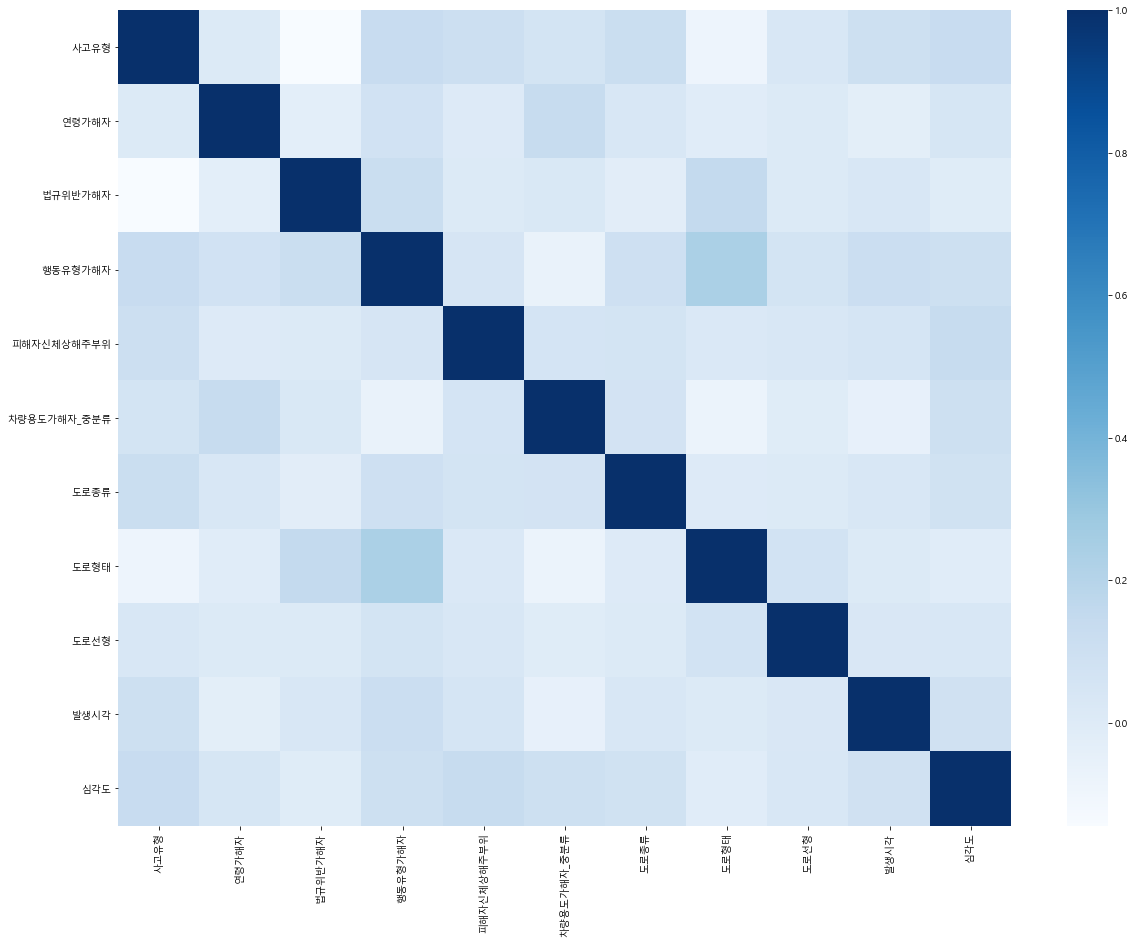

In [41]:
import matplotlib.pyplot as plt 
import seaborn as sns

# 한글 폰트 깨지는 것 때문에 추가함
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,15))
sns.heatmap(cor_data, cbar = True, annot = False, square = False, cmap = 'Blues')